In [1]:
from google.colab import files
import pandas as pd

print("Please upload your dataset (CSV file)")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"\n✅ Uploaded File: {file_name}")

df = pd.read_csv(file_name)
print("\n📊 First 5 Rows of Dataset:")
print(df.head())


Please upload your dataset (CSV file)


Saving Student_performance_data _.csv to Student_performance_data _.csv

✅ Uploaded File: Student_performance_data _.csv

📊 First 5 Rows of Dataset:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1   

In [3]:
print("\n🔍 Checking for Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)


🔍 Checking for Missing Values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['object']).columns
if not df[cat_cols].empty:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\n✅ Missing values filled!")


✅ Missing values filled!


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("\n🔤 Updated Column Names:", df.columns.tolist())


🔤 Updated Column Names: ['studentid', 'age', 'gender', 'ethnicity', 'parentaleducation', 'studytimeweekly', 'absences', 'tutoring', 'parentalsupport', 'extracurricular', 'sports', 'music', 'volunteering', 'gpa', 'gradeclass']


In [ ]:
cat_columns = ['gender', 'ethnicity', 'parentaleducation', 'parentalsupport', 'tutoring', 'extracurricular']
valid_columns = [col for col in cat_columns if col in df.columns]

if valid_columns:
    df = pd.get_dummies(df, columns=valid_columns, drop_first=True)

print("\n✅ Categorical Variables Encoded!")
print(df.head())  # Show first few rows after encoding


✅ Categorical Variables Encoded!
   studentid  age  studytimeweekly  absences  sports  music  volunteering  \
0       1001   17        19.833723         7       0      1             0   
1       1002   18        15.408756         0       0      0             0   
2       1003   15         4.210570        26       0      0             0   
3       1004   17        10.028829        14       0      0             0   
4       1005   17         4.672495        17       0      0             0   

        gpa  gradeclass  gender_1  ...  parentaleducation_1  \
0  2.929196         2.0      True  ...                False   
1  3.042915         1.0     False  ...                 True   
2  0.112602         4.0     False  ...                False   
3  2.054218         3.0      True  ...                False   
4  1.288061         4.0      True  ...                False   

   parentaleducation_2  parentaleducation_3  parentaleducation_4  \
0                 True                False             

In [ ]:
if 'gpa' in df.columns and 'gender_1' in df.columns:
    gpa_by_gender = df.groupby('gender_1')['gpa'].mean().reset_index()
    print("\n📊 Average GPA by Gender:")
    print(gpa_by_gender)


📊 Average GPA by Gender:
   gender_1       gpa
0     False  1.918679
1      True  1.894225


In [ ]:
cleaned_file_path = "/content/cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

print("\n✅ Cleaned dataset saved as 'cleaned_dataset.csv'!")


✅ Cleaned dataset saved as 'cleaned_dataset.csv'!


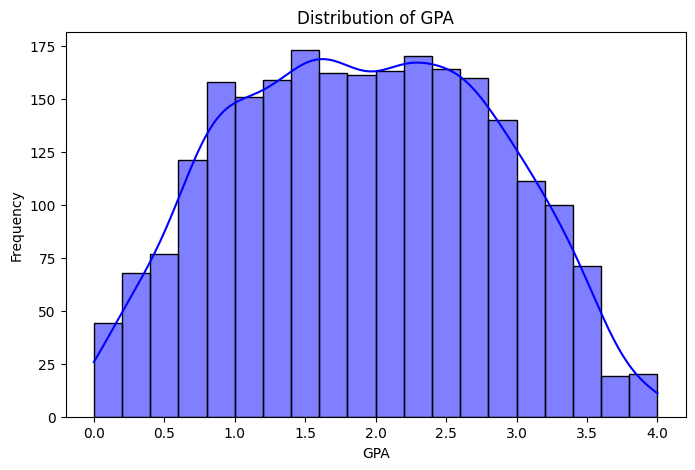

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'gpa' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['gpa'], bins=20, kde=True, color='blue')
    plt.title("Distribution of GPA")
    plt.xlabel("GPA")
    plt.ylabel("Frequency")
    plt.show()